## Library Import

In [1]:
%matplotlib inline
import itertools
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

## Helper function

In [2]:
#helper function
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
        
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## load Dataset

In [3]:
#load the csv file
# df=pd.read_csv('../input/Iris.csv')
iris = datasets.load_iris()

#Replace Species type with numbers
# df.Species.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 3], inplace=True)

# Split-out train, test dataset
array = iris.data
X = iris.data[:, [0, 1]]
Y = iris.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.5, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

## Decision Region of Decision Tree


One Neuron


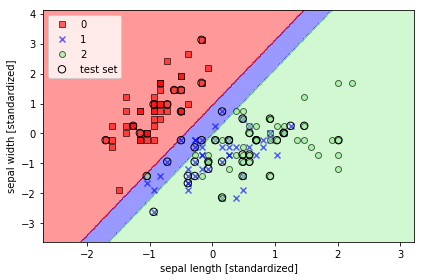


Multi-layer Perceptron


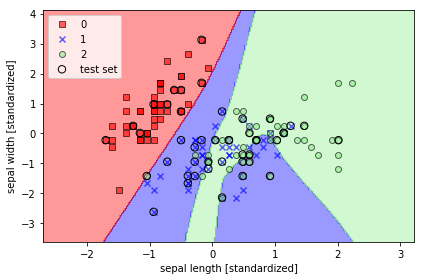


Decision Tree


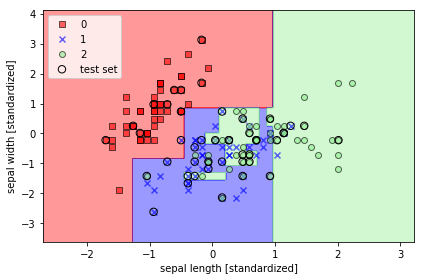


Naive Bayes


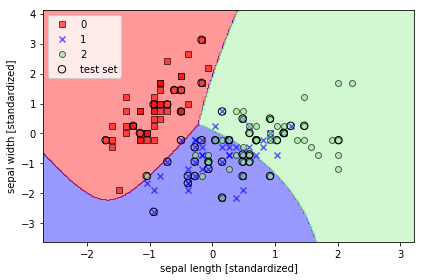


KNN


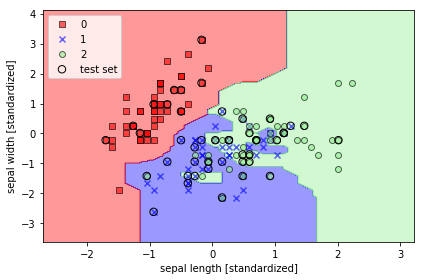

In [7]:
#####################################################
############### One Neuron #########################
#####################################################
#Initialize Decision Tree
on_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1), random_state=1)

#Fitting the training set
on_clf.fit(X_train_std, y_train) 

plot_decision_regions(X_combined_std, y_combined, classifier=on_clf, test_idx=range(105, 150))

plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
print("\nOne Neuron")
plt.show()


#####################################################
############### Neural Networks #####################
#####################################################
#Initialize Decision Tree
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(200, 200), random_state=1)
#hidden_layer_size가 높을 수록 복잡한 데이터 분석 가능 

#Fitting the training set
nn_clf.fit(X_train_std, y_train) 

plot_decision_regions(X_combined_std, y_combined, classifier=nn_clf, test_idx=range(105, 150))

plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
print("\nMulti-layer Perceptron")
plt.show()



#####################################################
############### Decision Tree #######################
#####################################################
#Initialize Decision Tree
dt_clf = tree.DecisionTreeClassifier()

#Fitting the training set
dt_clf.fit(X_train_std, y_train) 

plot_decision_regions(X_combined_std, y_combined, classifier=dt_clf, test_idx=range(105, 150))

plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
print("\nDecision Tree")
plt.show()

#####################################################
############### Naive Bayes #########################
#####################################################
#Initialize Gaussian Naive Bayes
nb_clf = GaussianNB()

#Fitting the training set
nb_clf.fit(X_train_std, y_train) 

plot_decision_regions(X_combined_std, y_combined, classifier=nb_clf, test_idx=range(105, 150))

plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
print("\nNaive Bayes")
plt.show()


#####################################################
############### KNN #################################
#####################################################
#Initialize KNN
knn_clf = KNeighborsClassifier(n_neighbors=1, p=1, metric='minkowski')

#Fitting the training set
knn_clf.fit(X_train_std, y_train) 

plot_decision_regions(X_combined_std, y_combined, classifier=knn_clf, test_idx=range(105, 150))

plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
print("\nKNN")
plt.show()

In [5]:
#load the csv file
# df=pd.read_csv('../input/Iris.csv')
iris = datasets.load_iris()

#Replace Species type with numbers
# df.Species.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 3], inplace=True)

# Split-out train, test dataset
array = iris.data
full_X = iris.data
Y = iris.target

full_X_train, full_X_test, full_y_train, full_y_test = model_selection.train_test_split(full_X, Y, test_size=0.5, random_state=0)

sc = StandardScaler()
sc.fit(full_X_train)
full_X_train_std = sc.transform(full_X_train)
full_X_test_std = sc.transform(full_X_test)
full_X_combined_std = np.vstack((full_X_train_std, full_X_test_std))
full_y_combined = np.hstack((full_y_train, full_y_test))

## Perceptron Classification Using Total Features

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        21
 versicolor       0.00      0.00      0.00        30
  virginica       0.44      1.00      0.62        24

avg / total       0.42      0.60      0.48        75


 Accuracy
0.6
Confusion matrix, without normalization
[[21  0  0]
 [ 0  0 30]
 [ 0  0 24]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


C:\Miniconda3\envs\python\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


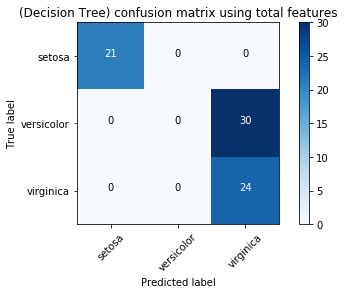

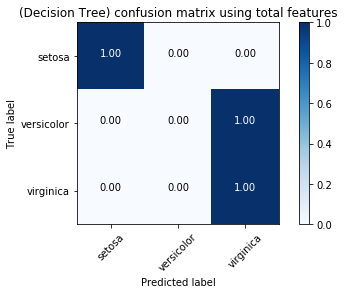

In [6]:
full_on_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1), random_state=1)

#Fitting the training set
full_on_clf.fit(full_X_train_std, full_y_train) 

full_on_y_pred = full_on_clf.predict(full_X_test_std)

print("Classification Report")
print(classification_report(full_y_test, full_on_y_pred, target_names=iris.target_names))

print("\n Accuracy")
print(accuracy_score(full_y_test, full_on_y_pred))

# Compute confusion matrix
full_on_cnf_matrix = confusion_matrix(full_y_test, full_on_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(full_on_cnf_matrix, classes=iris.target_names,
                      title='(Decision Tree) confusion matrix using total features')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(full_on_cnf_matrix, classes=iris.target_names, normalize=True,
                      title='(Decision Tree) confusion matrix using total features')

plt.show()

## Multi-layer Perceptron Classification Using Total Features

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        21
 versicolor       0.97      0.97      0.97        30
  virginica       0.96      0.96      0.96        24

avg / total       0.97      0.97      0.97        75


 Accuracy
0.9733333333333334
Confusion matrix, without normalization
[[21  0  0]
 [ 0 29  1]
 [ 0  1 23]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.97 0.03]
 [0.   0.04 0.96]]


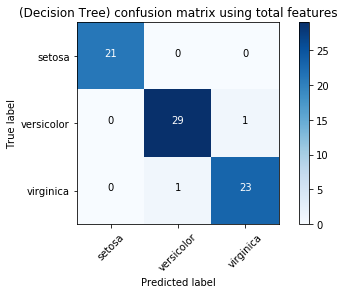

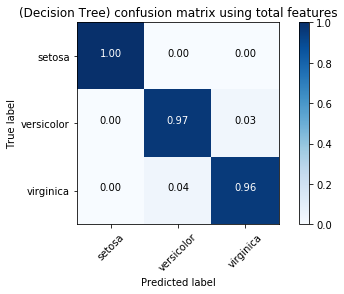

In [7]:
#Initialize Gaussian Naive Bayes
full_nn_clf = MLPClassifier(solver='lbfgs', 
                            alpha=1e-5, 
                            hidden_layer_sizes=(100, 100), 
                            random_state=1)

#Fitting the training set
full_nn_clf.fit(full_X_train_std, full_y_train) 

full_nn_y_pred = full_nn_clf.predict(full_X_test_std)

print("Classification Report")
print(classification_report(full_y_test, full_nn_y_pred, target_names=iris.target_names))

print("\n Accuracy")
print(accuracy_score(full_y_test, full_nn_y_pred))

# Compute confusion matrix
full_nn_cnf_matrix = confusion_matrix(full_y_test, full_nn_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(full_nn_cnf_matrix, classes=iris.target_names,
                      title='(Decision Tree) confusion matrix using total features')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(full_nn_cnf_matrix, classes=iris.target_names, normalize=True,
                      title='(Decision Tree) confusion matrix using total features')

plt.show()

## Decision Tree Classification Using Total Features

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        21
 versicolor       0.94      0.97      0.95        30
  virginica       0.96      0.92      0.94        24

avg / total       0.96      0.96      0.96        75


 Accuracy
0.96
Confusion matrix, without normalization
[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.97 0.03]
 [0.   0.08 0.92]]


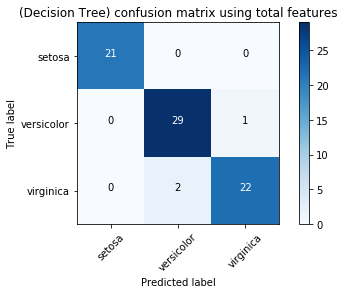

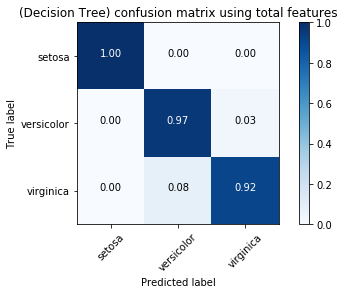

In [8]:
#Initialize Gaussian Naive Bayes
full_dt_clf = tree.DecisionTreeClassifier()

#Fitting the training set
full_dt_clf.fit(full_X_train_std, full_y_train) 

full_dt_y_pred = full_dt_clf.predict(full_X_test_std)

print("Classification Report")
print(classification_report(full_y_test, full_dt_y_pred, target_names=iris.target_names))

print("\n Accuracy")
print(accuracy_score(full_y_test, full_dt_y_pred))

# Compute confusion matrix
full_dt_cnf_matrix = confusion_matrix(full_y_test, full_dt_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(full_dt_cnf_matrix, classes=iris.target_names,
                      title='(Decision Tree) confusion matrix using total features')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(full_dt_cnf_matrix, classes=iris.target_names, normalize=True,
                      title='(Decision Tree) confusion matrix using total features')

plt.show()

## Naive Bayes Classification Using Total Features

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        21
 versicolor       0.88      1.00      0.94        30
  virginica       1.00      0.83      0.91        24

avg / total       0.95      0.95      0.95        75


 Accuracy
0.9466666666666667
Confusion matrix, without normalization
[[21  0  0]
 [ 0 30  0]
 [ 0  4 20]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   0.17 0.83]]


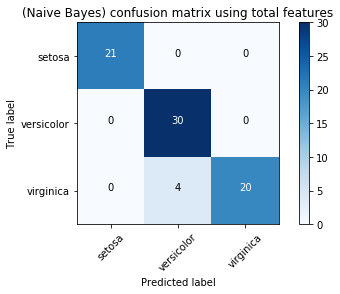

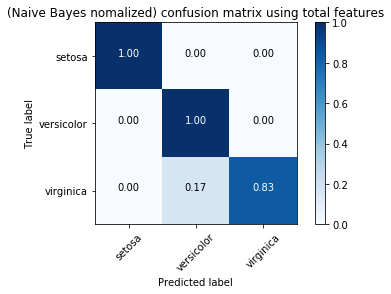

In [9]:
#Initialize Gaussian Naive Bayes
full_nb_clf = GaussianNB()

#Fitting the training set
full_nb_clf.fit(full_X_train_std, full_y_train) 

full_nb_y_pred = full_nb_clf.predict(full_X_test_std)

print("Classification Report")
print(classification_report(full_y_test, full_nb_y_pred, target_names=iris.target_names))

print("\n Accuracy")
print(accuracy_score(full_y_test, full_nb_y_pred))

# Compute confusion matrix
full_nb_cnf_matrix = confusion_matrix(full_y_test, full_nb_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(full_nb_cnf_matrix, classes=iris.target_names,
                      title='(Naive Bayes) confusion matrix using total features')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(full_nb_cnf_matrix, classes=iris.target_names, normalize=True,
                      title='(Naive Bayes nomalized) confusion matrix using total features')

plt.show()

## KNN Classification Using Total Features

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        21
 versicolor       0.85      0.97      0.91        30
  virginica       0.95      0.79      0.86        24

avg / total       0.93      0.92      0.92        75


 Accuracy
0.92
Confusion matrix, without normalization
[[21  0  0]
 [ 0 29  1]
 [ 0  5 19]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.97 0.03]
 [0.   0.21 0.79]]


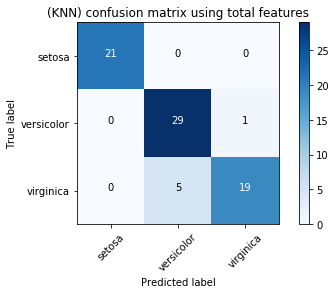

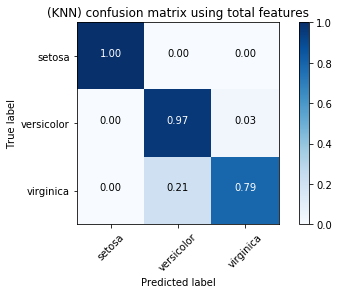

In [10]:
#Initialize Gaussian Naive Bayes
full_knn_clf = KNeighborsClassifier(n_neighbors=1, p=1, metric='minkowski')

#Fitting the training set
full_knn_clf.fit(full_X_train_std, full_y_train) 

full_knn_y_pred = full_knn_clf.predict(full_X_test_std)

print("Classification Report")
print(classification_report(full_y_test, full_knn_y_pred, target_names=iris.target_names))

print("\n Accuracy")
print(accuracy_score(full_y_test, full_knn_y_pred))

# Compute confusion matrix
full_knn_cnf_matrix = confusion_matrix(full_y_test, full_knn_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(full_knn_cnf_matrix, classes=iris.target_names,
                      title='(KNN) confusion matrix using total features')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(full_knn_cnf_matrix, classes=iris.target_names, normalize=True,
                      title='(KNN) confusion matrix using total features')

plt.show()

## Plot the decision surface of a MLP on the iris dataset

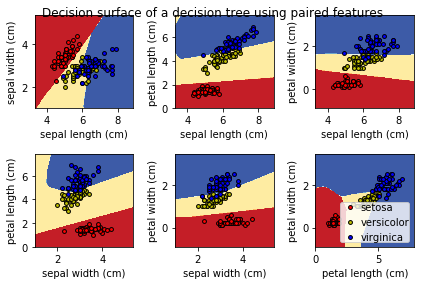

In [11]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = datasets.load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = MLPClassifier(solver='lbfgs', 
                            alpha=1e-5, 
                            hidden_layer_sizes=(100, 100), 
                            random_state=1).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.tight_layout()
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.savefig('./MLP_Decision_Region.png', dpi=300)
plt.show()

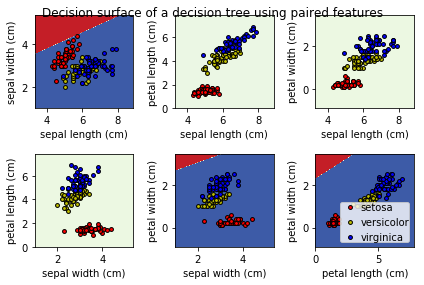

In [12]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = datasets.load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = MLPClassifier(solver='lbfgs', 
                            alpha=1e-5, 
                            hidden_layer_sizes=(1), 
                            random_state=1).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.tight_layout()
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.savefig('./One_Neuron_Decision_Region.png', dpi=300)
plt.show()

## Exercise 1 Make Following Resutls


One Neuron


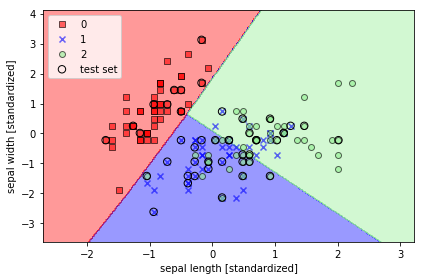

In [10]:
#####################################################
############### One Neuron #########################
#####################################################
#Initialize Decision Tree
on_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(2), random_state=1)

#Fitting the training set
on_clf.fit(X_train_std, y_train) 

plot_decision_regions(X_combined_std, y_combined, classifier=on_clf, test_idx=range(105, 150))

plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
print("\nOne Neuron")
plt.show()

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        21
 versicolor       0.97      0.97      0.97        30
  virginica       0.96      0.96      0.96        24

avg / total       0.97      0.97      0.97        75


 Accuracy
0.9733333333333334
Confusion matrix, without normalization
[[21  0  0]
 [ 0 29  1]
 [ 0  1 23]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.97 0.03]
 [0.   0.04 0.96]]


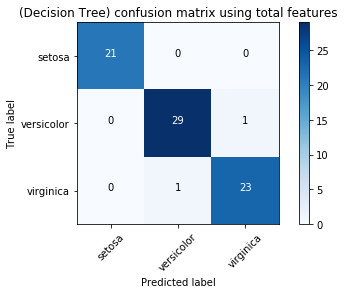

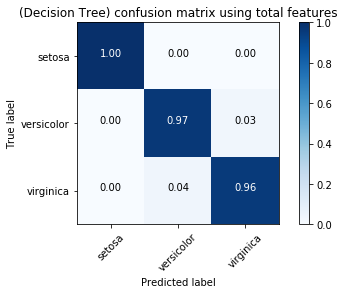

In [12]:
#Initialize Gaussian Naive Bayes
full_nn_clf = MLPClassifier(solver='lbfgs', 
                            alpha=1e-5, 
                            hidden_layer_sizes=(2), 
                            random_state=1)

#Fitting the training set
full_nn_clf.fit(full_X_train_std, full_y_train) 

full_nn_y_pred = full_nn_clf.predict(full_X_test_std)

print("Classification Report")
print(classification_report(full_y_test, full_nn_y_pred, target_names=iris.target_names))

print("\n Accuracy")
print(accuracy_score(full_y_test, full_nn_y_pred))

# Compute confusion matrix
full_nn_cnf_matrix = confusion_matrix(full_y_test, full_nn_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(full_nn_cnf_matrix, classes=iris.target_names,
                      title='(Decision Tree) confusion matrix using total features')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(full_nn_cnf_matrix, classes=iris.target_names, normalize=True,
                      title='(Decision Tree) confusion matrix using total features')

plt.show()

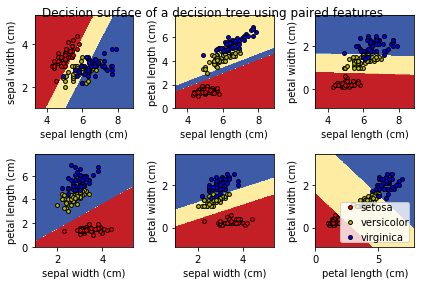

In [11]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = datasets.load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = MLPClassifier(solver='lbfgs', 
                            alpha=1e-5, 
                            hidden_layer_sizes=(2), 
                            random_state=1).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.tight_layout()
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.savefig('./One_Neuron_Decision_Region.png', dpi=300)
plt.show()